<a href="https://colab.research.google.com/github/sgrubas/cats/blob/main/tutorials/DetectionAutotuner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install git+https://github.com/sgrubas/cats.git  # CATS installation

# Autotuning parameters with `Optuna`

In [1]:
import numpy as np
import holoviews as hv
import gc
import pandas as pd

import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
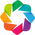

In [2]:
import cats

# Workflow and setup

## Training set
To fine-tuning the **denoiser**, we need to prepare a training set:
1. Several strong typical events, must be significantly stronger than background noise (preferable SNR > 10 db).
2. Reference waveforms of real noise.
4. Input and output data: waveforms with strong events

## Synthetic dataset
In this tutorial, we'll cover fine-tuning using a synthetic data and random white gaussian noise.

In [3]:
data = cats.import_sample_data()

Dclean = data['data'][::2]  # take only X and Z component (Y is empty)
time = data['time']  # time
dt = data['dt']      # sampling time
x = data['x']        # location of recievers 
dimensions = ["Component", "Receiver", "Time"]

:Overlay
   .Curve.E.I    :Curve   [Time]   (Station)
   .Curve.Z.I    :Curve   [Time]   (Station)
   .Curve.E.II   :Curve   [Time]   (Station)
   .Curve.Z.II   :Curve   [Time]   (Station)
   .Curve.E.III  :Curve   [Time]   (Station)
   .Curve.Z.III  :Curve   [Time]   (Station)
   .Curve.E.IV   :Curve   [Time]   (Station)
   .Curve.Z.IV   :Curve   [Time]   (Station)
   .Curve.E.V    :Curve   [Time]   (Station)
   .Curve.Z.V    :Curve   [Time]   (Station)
   .Curve.E.VI   :Curve   [Time]   (Station)
   .Curve.Z.VI   :Curve   [Time]   (Station)
   .Curve.E.VII  :Curve   [Time]   (Station)
   .Curve.Z.VII  :Curve   [Time]   (Station)
   .Curve.E.VIII :Curve   [Time]   (Station)
   .Curve.Z.VIII :Curve   [Time]   (Station)
   .Curve.E.IX   :Curve   [Time]   (Station)
   .Curve.Z.IX   :Curve   [Time]   (Station)
   .Curve.E.X    :Curve   [Time]   (Station)
   .Curve.Z.X    :Curve   [Time]   (Station)
   .Points.Picks :Points   [Time,Station]
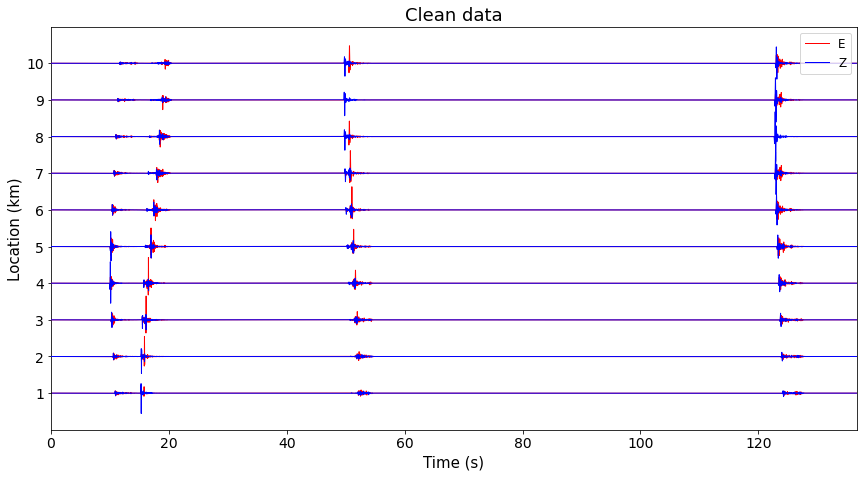

In [4]:
fig = cats.plot_traces(data=Dclean, time=time, gain=0.5, component_labels=['E', "Z"])
fig = fig.opts(ylabel='Location (km)', title='Clean data')
# hv.save(fig, "../clean_traces_sample.png", dpi=250)  # use this to save figure
fig

## Training set - first two events

In [5]:
train_slice = cats.utils.give_index_slice_by_limits((0, 45), dt)

D_train = Dclean[:, ::2, train_slice]
D_train.shape

(2, 5, 23035)

:Overlay
   .Curve.E.I    :Curve   [Time]   (Station)
   .Curve.Z.I    :Curve   [Time]   (Station)
   .Curve.E.II   :Curve   [Time]   (Station)
   .Curve.Z.II   :Curve   [Time]   (Station)
   .Curve.E.III  :Curve   [Time]   (Station)
   .Curve.Z.III  :Curve   [Time]   (Station)
   .Curve.E.IV   :Curve   [Time]   (Station)
   .Curve.Z.IV   :Curve   [Time]   (Station)
   .Curve.E.V    :Curve   [Time]   (Station)
   .Curve.Z.V    :Curve   [Time]   (Station)
   .Points.Picks :Points   [Time,Station]
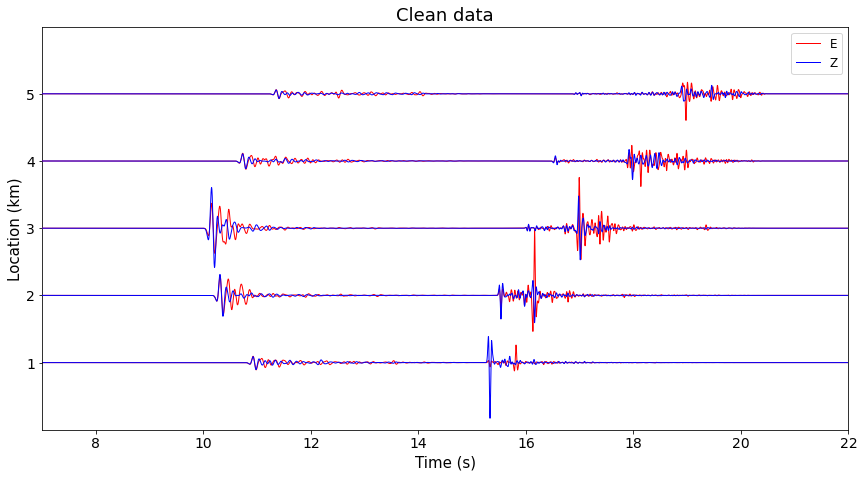

In [6]:
fig = cats.plot_traces(data=D_train, time=dt, time_interval_sec=(7, 22), gain=0.5, component_labels=['E', "Z"])
fig = fig.opts(ylabel='Location (km)', title='Clean data')
# hv.save(fig, "../clean_traces_sample.png", dpi=250)  # use this to save figure
fig

In [7]:
event_onset_slice = cats.utils.give_index_slice_by_limits((10, 12), dt)  # interval of the event, for reference amplitudes
reference_level = D_train[..., event_onset_slice].std()

augmenter = cats.tune.TraceAugmenter(traces=[D_train], 
                                     reference_outputs=[D_train],
                                     reference_level=[reference_level],
                                     random_noise_levels=[0.1, 0.5, 1.25],
                                     random_noise_colors=[0.0],
                                     product_levels_and_colors=True,
                                     random_noise_repeats=1)

In [8]:
cats_denoiser = cats.CATSDenoiser(dt_sec=dt,  # init default instance
                                  aggr_clustering_axis=0)  # enabled multi-component CATS

# This operator will be used to evaluate the denoiser performance
cats_scoring = cats.tune.DenoiserScoring(operator=cats_denoiser,
                                         generator_x_and_y=augmenter,
                                         metric_functions={"Rel_L2": 'rel l2'},
                                         )

## Objective function

Now, we need to make an objective function we will optimize with Optuna.
For the parameters we want to tune, we need to use `trial.suggest` API, see below. Non-tunable params are defined as usual. 
You can customize the params you want to tune and their search space. If you want a parameter to be fixed, remove `trial.suggest` and assign any value.

In [9]:
def cats_objective(trial):
    # 'optuna.Trial' keeps all parameter names in `optuna.Trial.params`
    # so, we do not need to keep them in separate variables, as long as we provide correct names to '.suggest'

    stft_window_sec = trial.suggest_categorical('stft_window_sec', [0.064, 0.128, 0.256, 0.512, 1.024, 2.048])
    stft_overlap = trial.suggest_float('stft_overlap', 0.2, 0.95, step=0.025)
    minSNR = trial.suggest_float('minSNR', 4.0, 15.0, step=0.1)
    
    cluster_size_t_sec = trial.suggest_float('cluster_size_t_sec', 0.0, 5.0, step=0.01)
    cluster_distance_t_sec = trial.suggest_float('cluster_distance_t_sec', 0.0, 1.0, step=0.01)
    # cluster_size_f_Hz = trial.suggest_float('cluster_size_f_Hz', 0.0, 50.0, step=0.1)  # frequency width in Hertz
    cluster_size_f_octaves = trial.suggest_float('cluster_size_f_octaves', 0.0, 5.0, step=0.01)  # frequency width in octaves!
    cluster_distance_f_Hz = trial.suggest_float('cluster_distance_f_Hz', 0.0, 15.0)
    
    # Update detector params
    cats_scoring.update_operator(stft_window_sec=stft_window_sec,
                                 stft_overlap=stft_overlap,
                                 minSNR=minSNR,
                                 cluster_size_t_sec=cluster_size_t_sec,
                                 cluster_distance_t_sec=cluster_distance_t_sec,
                                 # cluster_size_f_Hz=cluster_size_f_Hz,  # frequency width in Hertz
                                 cluster_size_f_octaves=cluster_size_f_octaves,  # frequency width in octaves!
                                 cluster_distance_f_Hz=cluster_distance_f_Hz,
                                 )

    evaluated = cats_scoring.evaluate()
    rel_l2 = np.array(evaluated['Rel_L2']).mean()
    time = np.mean(evaluated['Elapsed_time_sec'])
    return rel_l2, time  # two metrics are optimized simultaneously

## Run tuning

In [10]:
metric_directions = {"Rel_L2": "minimize", 
                     "Elapsed_time_sec": "minimize"}

In [11]:
# Callback cleaning the memory, needed to maintain RAM not occupied by garbage

class GCcallback:
    def __init__(self, gc_every=500):
        self.gc_every = gc_every
        self.counter = 0

    def __call__(self, study: optuna.study.Study, trial: optuna.trial.FrozenTrial) -> None:
        self.counter += 1
        if (self.counter % self.gc_every) == 0:
            gc.collect()

gccallback = GCcallback(30)  # after each N itertations it collects garbage

In [12]:
study = optuna.create_study(study_name="CATS_Denoiser", 
                            directions=metric_directions.values(),
                            sampler=optuna.samplers.NSGAIIISampler()
                           )

C:\Users\seraf\AppData\Local\Temp\ipykernel_22644\4013800414.py:3: ExperimentalWarning: NSGAIIISampler is experimental (supported from v3.2.0). The interface can change in the future.
  sampler=optuna.samplers.NSGAIIISampler()


In [13]:
study.optimize(cats_objective, 
               n_trials=300,  # the more trials the better, but too much is not necessary
               show_progress_bar=True, 
               callbacks=[gccallback])

  0%|          | 0/300 [00:00<?, ?it/s]

Visualize the tuning trials

In [14]:
gc.collect()

18

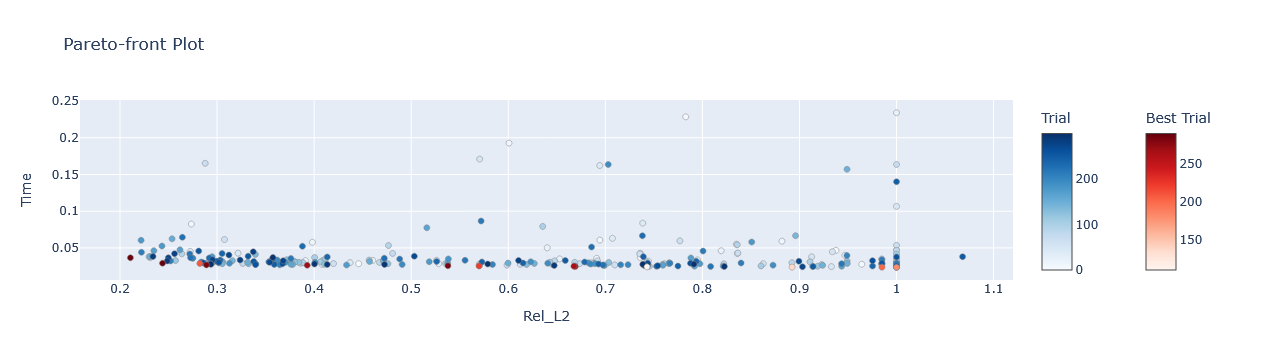

In [20]:
optuna.visualization.plot_pareto_front(study, 
                                       target_names=["Rel_L2", "Time"], 
                                       include_dominated_trials=True,
                                       targets=lambda t: t.values)

From the tuning process, we can see the importance of each parameter on the objectives

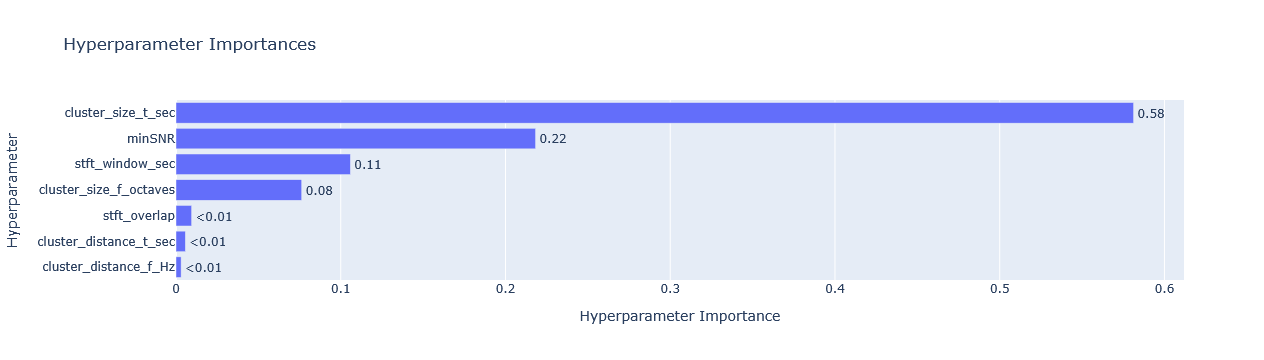

In [18]:
optuna.visualization.plot_param_importances(
    study, target=lambda t: t.values[0], target_name="Rel_L2"
)

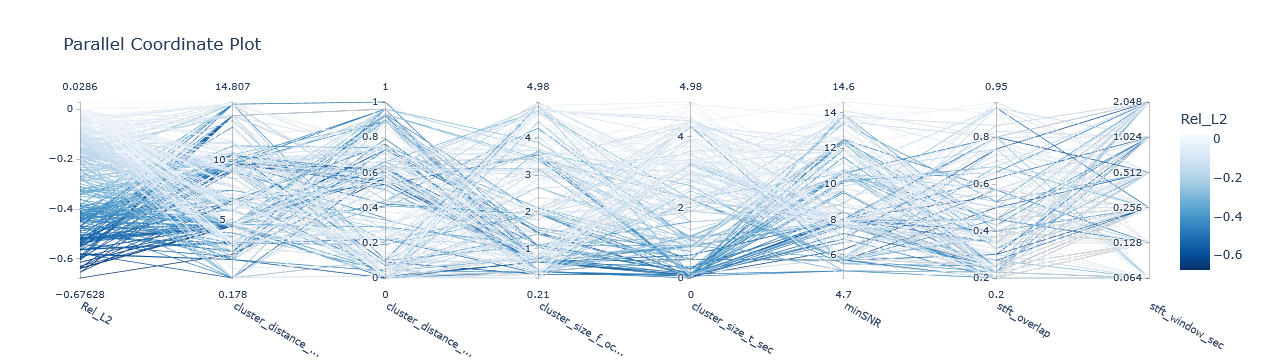

In [19]:
optuna.visualization.plot_parallel_coordinate(study, 
                                              target=lambda t: np.log10(t.values[0]), 
                                              target_name="Rel_L2")

In [21]:
# Multi-objective optimization gives many solutions (Pareto front)
# they can be accessed via '.best_trials'
# we will choose one set of parameters based on maximum F_1 score

best_score = min(study.best_trials, key=lambda t: t.values[0])

In [22]:
best_score.values, best_score.params

([0.21072584834153027, 0.0366209333333245],
 {'stft_window_sec': 0.512,
  'stft_overlap': 0.5,
  'minSNR': 5.7,
  'cluster_size_t_sec': 0.53,
  'cluster_distance_t_sec': 0.5700000000000001,
  'cluster_size_f_octaves': 0.64,
  'cluster_distance_f_Hz': 2.1595641487635513})

## Save best denoiser

In [24]:
cats_denoiser.reset_params(**best_score.params)
cats_denoiser.save("CATS_denoiser_best")

## Results comparison

In [25]:
D_test = Dclean + np.random.randn(*Dclean.shape) * 0.06

### Default params

In [26]:
cats_default = cats.CATSDenoiser(dt_sec=dt)

In [27]:
default_res = cats_default ** D_test

1. STFT	...	Completed in 0.11 sec
2. B-E-DATE trimming	...	Completed in 0.0285 sec
3. Clustering	...	Completed in 0.00328 sec
4. Cluster catalog	...	Completed in 0.0307 sec
5. Inverse STFT	...	Completed in 0.0701 sec
Total elapsed time:	0.243 sec



:Overlay
   .Curve.E.I    :Curve   [Time]   (Station)
   .Curve.N.I    :Curve   [Time]   (Station)
   .Curve.E.II   :Curve   [Time]   (Station)
   .Curve.N.II   :Curve   [Time]   (Station)
   .Curve.E.III  :Curve   [Time]   (Station)
   .Curve.N.III  :Curve   [Time]   (Station)
   .Curve.E.IV   :Curve   [Time]   (Station)
   .Curve.N.IV   :Curve   [Time]   (Station)
   .Curve.E.V    :Curve   [Time]   (Station)
   .Curve.N.V    :Curve   [Time]   (Station)
   .Curve.E.VI   :Curve   [Time]   (Station)
   .Curve.N.VI   :Curve   [Time]   (Station)
   .Curve.E.VII  :Curve   [Time]   (Station)
   .Curve.N.VII  :Curve   [Time]   (Station)
   .Curve.E.VIII :Curve   [Time]   (Station)
   .Curve.N.VIII :Curve   [Time]   (Station)
   .Curve.E.IX   :Curve   [Time]   (Station)
   .Curve.N.IX   :Curve   [Time]   (Station)
   .Curve.E.X    :Curve   [Time]   (Station)
   .Curve.N.X    :Curve   [Time]   (Station)
   .Points.Picks :Points   [Time,Station]
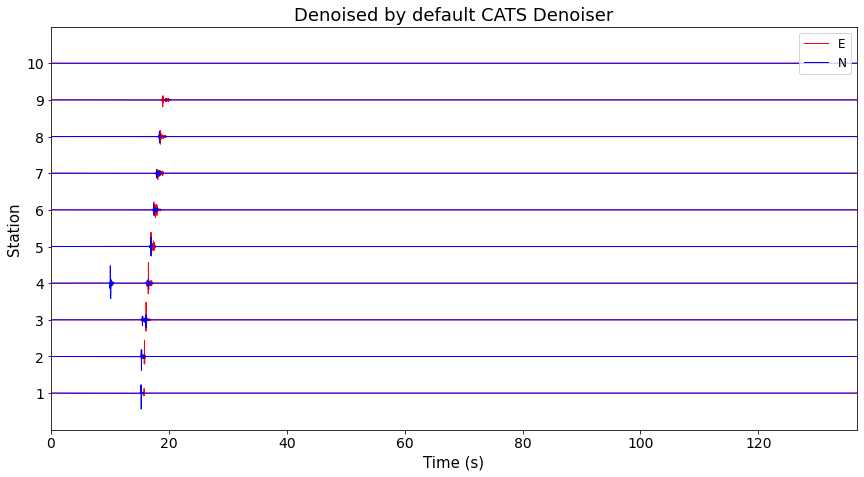

In [32]:
fig = default_res.plot_traces(gain=0.25).opts(title='Denoised by default CATS Denoiser')
fig

### Autotuned with `Optuna`

In [29]:
cats_tuned = cats.CATSDenoiser.load("CATS_denoiser_best.pickle")

In [30]:
tuned_res = cats_tuned ** D_test

1. STFT	...	Completed in 0.17 sec
2. B-E-DATE trimming	...	Completed in 0.0573 sec
3. Clustering	...	Completed in 0.006 sec
4. Cluster catalog	...	Completed in 0.0686 sec
5. Inverse STFT	...	Completed in 0.121 sec
Total elapsed time:	0.422 sec



:Overlay
   .Curve.E.I    :Curve   [Time]   (Station)
   .Curve.N.I    :Curve   [Time]   (Station)
   .Curve.E.II   :Curve   [Time]   (Station)
   .Curve.N.II   :Curve   [Time]   (Station)
   .Curve.E.III  :Curve   [Time]   (Station)
   .Curve.N.III  :Curve   [Time]   (Station)
   .Curve.E.IV   :Curve   [Time]   (Station)
   .Curve.N.IV   :Curve   [Time]   (Station)
   .Curve.E.V    :Curve   [Time]   (Station)
   .Curve.N.V    :Curve   [Time]   (Station)
   .Curve.E.VI   :Curve   [Time]   (Station)
   .Curve.N.VI   :Curve   [Time]   (Station)
   .Curve.E.VII  :Curve   [Time]   (Station)
   .Curve.N.VII  :Curve   [Time]   (Station)
   .Curve.E.VIII :Curve   [Time]   (Station)
   .Curve.N.VIII :Curve   [Time]   (Station)
   .Curve.E.IX   :Curve   [Time]   (Station)
   .Curve.N.IX   :Curve   [Time]   (Station)
   .Curve.E.X    :Curve   [Time]   (Station)
   .Curve.N.X    :Curve   [Time]   (Station)
   .Points.Picks :Points   [Time,Station]
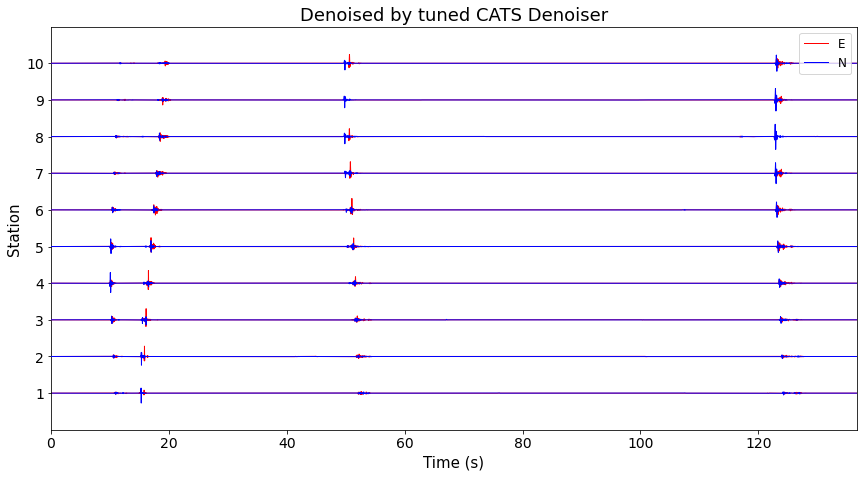

In [33]:
fig = tuned_res.plot_traces(gain=0.25).opts(title='Denoised by tuned CATS Denoiser')
fig

# Systematic test

This example shows how to use the proposed setup for tuning to systematically test the detector.

In [34]:
test_slices = [cats.utils.give_index_slice_by_limits((25, 80), dt),  # event 1
               cats.utils.give_index_slice_by_limits((80, None), dt),]  # event 2

D_test_set = [Dclean[..., ind_slice] for ind_slice in test_slices]  # test on full 3C data chunks

:Layout
   .Overlay.I  :Overlay
      .Curve.E.I    :Curve   [Time]   (Station)
      .Curve.N.I    :Curve   [Time]   (Station)
      .Curve.E.II   :Curve   [Time]   (Station)
      .Curve.N.II   :Curve   [Time]   (Station)
      .Curve.E.III  :Curve   [Time]   (Station)
      .Curve.N.III  :Curve   [Time]   (Station)
      .Curve.E.IV   :Curve   [Time]   (Station)
      .Curve.N.IV   :Curve   [Time]   (Station)
      .Curve.E.V    :Curve   [Time]   (Station)
      .Curve.N.V    :Curve   [Time]   (Station)
      .Curve.E.VI   :Curve   [Time]   (Station)
      .Curve.N.VI   :Curve   [Time]   (Station)
      .Curve.E.VII  :Curve   [Time]   (Station)
      .Curve.N.VII  :Curve   [Time]   (Station)
      .Curve.E.VIII :Curve   [Time]   (Station)
      .Curve.N.VIII :Curve   [Time]   (Station)
      .Curve.E.IX   :Curve   [Time]   (Station)
      .Curve.N.IX   :Curve   [Time]   (Station)
      .Curve.E.X    :Curve   [Time]   (Station)
      .Curve.N.X    :Curve   [Time]   (Station)
      .Points.Picks :Points   [Time,Station]
   .Overlay.II :Overlay
      .Curve.E.I    :Curve   [Time]   (Station)
      .Curve.N.I    :Curve   [Time]   (Station)
      .Curve.E.II   :Curve   [Time]   (Station)
      .Curve.N.II   :Curve   [Time]   (Station)
      .Curve.E.III  :Curve   [Time]   (Station)
      .Curve.N.III  :Curve   [Time]   (Station)
      .Curve.E.IV   :Curve   [Time]   (Station)
      .Curve.N.IV   :Curve   [Time]   (Station)
      .Curve.E.V    :Curve   [Time]   (Station)
      .Curve.N.V    :Curve   [Time]   (Station)
      .Curve.E.VI   :Curve   [Time]   (Station)
      .Curve.N.VI   :Curve   [Time]   (Station)
      .Curve.E.VII  :Curve   [Time]   (Station)
      .Curve.N.VII  :Curve   [Time]   (Station)
      .Curve.E.VIII :Curve   [Time]   (Station)
      .Curve.N.VIII :Curve   [Time]   (Station)
      .Curve.E.IX   :Curve   [Time]   (Station)
      .Curve.N.IX   :Curve   [Time]   (Station)
      .Curve.E.X    :Curve   [Time]   (Station)
      .Curve.N.X    :Curve   [Time]   (Station)
      .Points.Picks :Points   [Time,Station]
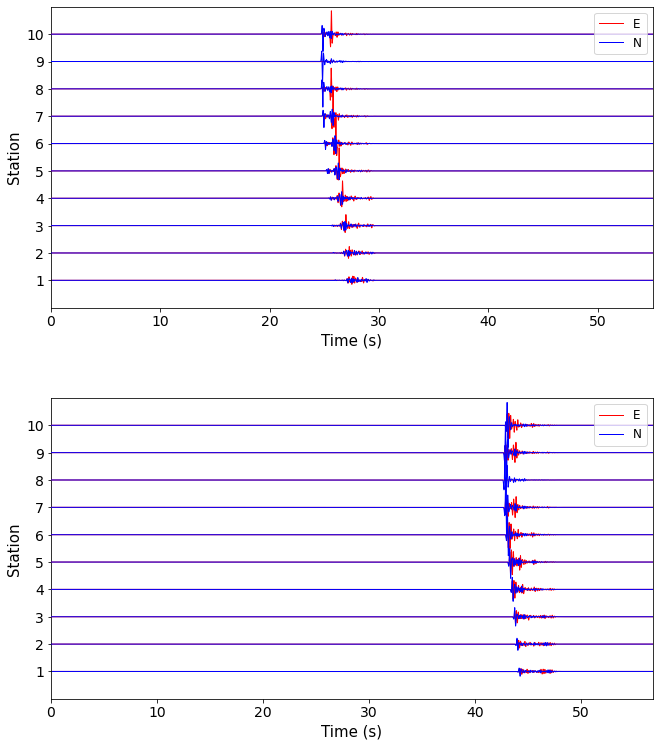

In [35]:
figs = [cats.plot_traces(data=d_chunk, time=dt, gain=0.5) for d_chunk in D_test_set]
hv.Layout(figs).cols(1).opts(sublabel_format="", fig_size=250)

In [46]:
# ref intervals
ref_intervals = [cats.utils.give_index_slice_by_limits((24, 29), dt),  # event 1
                 cats.utils.give_index_slice_by_limits((42, 46), dt),]  # event 2

reference_levels = [d_chunk[..., inds].std() 
                    for d_chunk, inds in zip(D_test_set, ref_intervals)]

result_container = cats.tune.utils.Recorder()

noise_levels = np.logspace(-2, 2, 15)

augmenter = cats.tune.TraceAugmenter(traces=D_test_set, 
                                     reference_outputs=D_test_set,
                                     reference_level=reference_levels,
                                     random_noise_levels=noise_levels,
                                     random_noise_colors=[0.0, 1.0, -1.0],
                                     random_noise_repeats=3,
                                     product_levels_and_colors=True,
                                     progress_bar=True,
                                     callbacks=[result_container]  # to save the evaluated metrics
                                    )

print("Total number of iterations:", len(augmenter))

Total number of iterations: 270


In [47]:
cats_denoiser = cats.CATSDenoiser.load("CATS_denoiser_best.pickle")   # we test our tuned CATS denoiser
cats_scoring = cats.tune.DenoiserScoring(operator=cats_denoiser,
                                         generator_x_and_y=augmenter,
                                         metric_functions={"Rel_L2": 'rel l2'},
                                         )

In [48]:
evaluated = cats_scoring.evaluate()
result_dict = {}
result_dict.update(evaluated)
result_dict.update(result_container.container)

df_summary = pd.DataFrame(result_dict)

Augmenter:   0%|          | 0/270 [00:00<?, ?it/s]

In [49]:
df_summary.head()

,Rel_L2,Elapsed_time_sec,trace,noise_level,noise_color,noise_name,counter
0,0.005074,0.091031,0,0.010000,0.0,random,1
1,0.018516,0.079404,0,0.010000,1.0,random,2
2,0.001315,0.064793,0,0.010000,-1.0,random,3
3,0.009564,0.073441,0,0.019307,0.0,random,4
4,0.039943,0.078216,0,0.019307,1.0,random,5


:Scatter   [noise_level]   (Rel_L2)
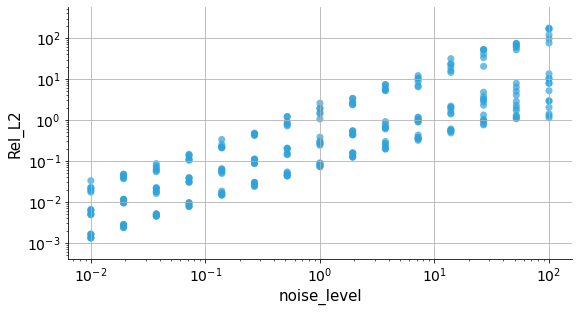

In [52]:
hv.Scatter(df_summary, kdims=['noise_level'], 
           vdims=['Rel_L2']).opts(aspect=2, fig_size=250, logy=True, logx=True,
                                  fontsize=dict(labels=15, ticks=14),
                                  s=50, alpha=0.7, show_grid=True)

In [53]:
df_summary.describe()

,Rel_L2,Elapsed_time_sec,trace,noise_level,noise_color,counter
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,6.915039,0.078730,0.500000,13.829035,0.000000,135.500000
std,23.214768,0.024437,0.500929,26.879660,0.818013,78.086491
min,0.001312,0.063328,0.000000,0.010000,-1.000000,1.000000
25%,0.039412,0.071110,0.000000,0.071969,-1.000000,68.250000
50%,0.300619,0.075357,0.500000,1.000000,0.000000,135.500000
75%,1.948240,0.079731,1.000000,13.894955,1.000000,202.750000
max,176.510541,0.410612,1.000000,100.000000,1.000000,270.000000


# Conclusion remarks

- This notebook provides a template and briefly introduces a method to autotune parameters of CATS using Optuna.
The autotuning can be applied on any other dataset, follow the recommendations in the beginning of the notebook.

- Any combination of CATS parameters can be optimized, we can add `clustering_multitrace` option as a tuned parameter.
Moreover, parameters can depend on each other, for example:

```python
use_octaves = trial.suggest_categorical('use_octaves', [True, False])

if use_octaves:
    cluster_size_f_Hz = -1
    cluster_size_f_octaves = trial.suggest_float('cluster_size_f_octaves', 0.0, 5.0, step=0.01)
else:
    cluster_size_f_Hz = trial.suggest_float('cluster_size_f_Hz', 0.0, 50.0, step=0.1)
    cluster_size_f_octaves = -1

```

- The tuning dataset does **not** have to be big, it should contain a few examples of picked events of interest and typical noise.
- The autotuning can help optimize parameters and achieve the best performance, without taking much time.